In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
file_path = "C:/Users/HP/Desktop/NSSO68.csv"
data = pd.read_csv(file_path, low_memory=False)

In [3]:
# Display the first few rows of the dataset to understand its structure
data.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [4]:
list(data.columns)

['slno',
 'grp',
 'Round_Centre',
 'FSU_number',
 'Round',
 'Schedule_Number',
 'Sample',
 'Sector',
 'state',
 'State_Region',
 'District',
 'Stratum_Number',
 'Sub_Stratum',
 'Schedule_type',
 'Sub_Round',
 'Sub_Sample',
 'FOD_Sub_Region',
 'Hamlet_Group_Sub_Block',
 't',
 'X_Stage_Stratum',
 'HHS_No',
 'Level',
 'Filler',
 'hhdsz',
 'NIC_2008',
 'NCO_2004',
 'HH_type',
 'Religion',
 'Social_Group',
 'Whether_owns_any_land',
 'Type_of_land_owned',
 'Land_Owned',
 'Land_Leased_in',
 'Otherwise_possessed',
 'Land_Leased_out',
 'Land_Total_possessed',
 'During_July_June_Cultivated',
 'During_July_June_Irrigated',
 'NSS',
 'NSC',
 'MLT',
 'land_tt',
 'Cooking_code',
 'Lighting_code',
 'Dwelling_unit_code',
 'Regular_salary_earner',
 'Perform_Ceremony',
 'Meals_seved_to_non_hhld_members',
 'Possess_ration_card',
 'Type_of_ration_card',
 'MPCE_URP',
 'MPCE_MRP',
 'Person_Srl_No',
 'Relation',
 'Sex',
 'Age',
 'Marital_Status',
 'Education',
 'Days_Stayed_away',
 'No_of_Meals_per_day',
 'Me

In [5]:
# Create a new feature called NV
data['NV'] = data[['eggsno_q', 'fishprawn_q', 'goatmeat_q', 'beef_q', 'pork_q', 'chicken_q', 'othrbirds_q']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

In [6]:
data.shape

(101662, 385)

In [7]:
df= data.copy()

In [8]:
df.dropna(how= 'all',inplace=True)

In [9]:
df1 = df[['NV','HH_type', 'Religion', 'Social_Group', 'Regular_salary_earner', 
          'Possess_ration_card', 'Sex', 'Age', 'Marital_Status', 'Education', 
          'Meals_At_Home', 'Region', 'hhdsz', 'NIC_2008', 'NCO_2004']]

In [10]:
df1.dropna(how='any',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23676\3273085477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(how='any',inplace=True)


In [11]:
df1

,NV,HH_type,Religion,Social_Group,Regular_salary_earner,Possess_ration_card,Sex,Age,Marital_Status,Education,Meals_At_Home,Region,hhdsz,NIC_2008,NCO_2004
0,1,2.0,1.0,3.0,1.0,1.0,1,50,2.0,8.0,59.0,2,5,47510.0,411.0
1,1,2.0,3.0,9.0,1.0,1.0,2,40,3.0,12.0,56.0,2,2,85102.0,331.0
2,1,1.0,1.0,9.0,1.0,1.0,1,45,2.0,7.0,60.0,2,5,49219.0,121.0
3,1,2.0,3.0,9.0,1.0,1.0,1,75,3.0,6.0,60.0,2,3,49231.0,911.0
4,1,1.0,1.0,9.0,2.0,1.0,1,30,2.0,7.0,59.0,2,4,45403.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101657,0,1.0,1.0,9.0,2.0,2.0,1,39,2.0,7.0,90.0,2,6,1412.0,612.0
101658,1,3.0,1.0,9.0,1.0,1.0,1,38,2.0,6.0,90.0,2,5,35109.0,724.0
101659,1,5.0,1.0,9.0,2.0,1.0,1,42,2.0,5.0,90.0,2,7,41001.0,920.0
101660,0,2.0,1.0,9.0,2.0,1.0,1,40,2.0,8.0,90.0,2,5,47211.0,522.0


In [12]:
# Add a constant term for the intercept
# Define dependent variable (y) and independent variables (X)
y = df1['NV']
X = df1[['HH_type', 'Religion', 'Social_Group', 'Regular_salary_earner', 
          'Possess_ration_card', 'Sex', 'Age', 'Marital_Status', 'Education', 
          'Meals_At_Home', 'Region', 'hhdsz', 'NIC_2008', 'NCO_2004']]

# Assuming X is your DataFrame containing the independent variables
X['Social_Group'] = X['Social_Group'].astype('category')
X['Regular_salary_earner'] = X['Regular_salary_earner'].astype('category')
X['HH_type'] = X['HH_type'].astype('category')
X['Possess_ration_card'] = X['Possess_ration_card'].astype('category')
X['Sex'] = X['Sex'].astype('category')
X['Marital_Status'] = X['Marital_Status'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Region'] = X['Region'].astype('category')

X= sm.add_constant(X)

# Fit the probit regression model
probit_model = Probit(y, X).fit()

# Print the summary of the model
print(probit_model.summary())

C:\Users\HP\AppData\Local\Temp\ipykernel_23676\1337055392.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Social_Group'] = X['Social_Group'].astype('category')
C:\Users\HP\AppData\Local\Temp\ipykernel_23676\1337055392.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Regular_salary_earner'] = X['Regular_salary_earner'].astype('category')
C:\Users\HP\AppData\Local\Temp\ipykernel_23676\1337055392.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Optimization terminated successfully.
         Current function value: 0.589533
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                     NV   No. Observations:                93096
Model:                         Probit   Df Residuals:                    93081
Method:                           MLE   Df Model:                           14
Date:                Tue, 30 Jul 2024   Pseudo R-squ.:                 0.05196
Time:                        02:04:54   Log-Likelihood:                -54883.
converged:                       True   LL-Null:                       -57891.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0501      0.056      0.902      0.367      -0.059       0.

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                3100               26082
Actual Positive                2157               61757


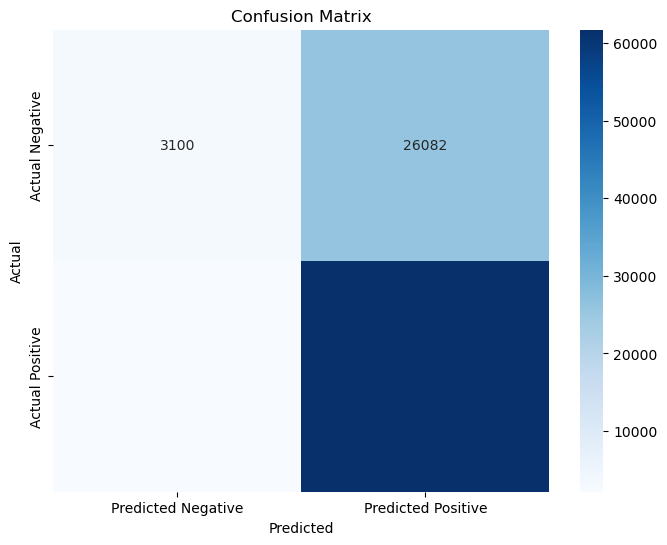

In [13]:
# Predict probabilities
predicted_probs = probit_model.predict(X)

# Convert probabilities to binary predictions using a threshold of 0.5
predicted_classes = (predicted_probs > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y, predicted_classes)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix:\n", conf_matrix_df)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

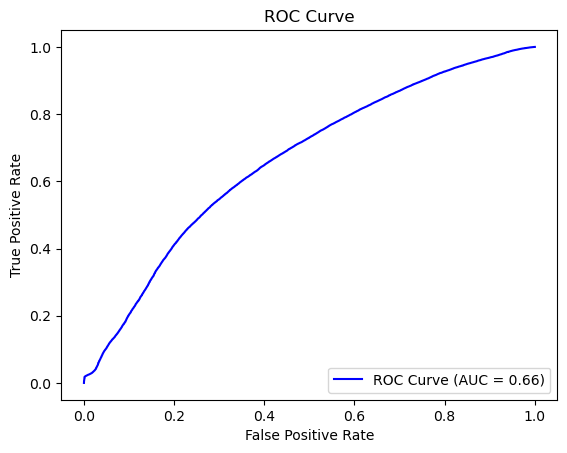

AUC: 0.6624909652546589
Accuracy: 0.6966679556586749
Precision: 0.7030703901456073
Recall: 0.9662515254873737
F1 Score: 0.8139147166777593


In [14]:
# ROC curve and AUC value
fpr, tpr, _ = roc_curve(y, predicted_probs)
auc_value = roc_auc_score(y, predicted_probs)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
print(f"AUC: {auc_value}")

# Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y, predicted_classes)
precision = precision_score(y, predicted_classes)
recall = recall_score(y, predicted_classes)
f1 = f1_score(y, predicted_classes)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")